In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [2]:
print(X[:5],y[:5])

[[-0.26943684 -0.79156516]
 [-0.8365411  -0.31013335]
 [-0.48761304 -0.64150224]
 [-0.5262646  -0.57836632]
 [-1.14797714  0.05152062]] [1 1 1 1 1]


In [3]:
from collections import Counter
print(Counter(y))

Counter({1: 950, 0: 50})


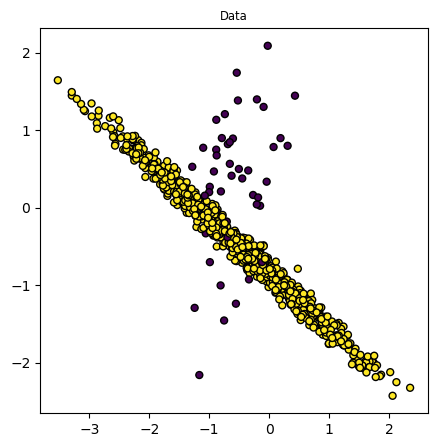

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.title("Data", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")


In [5]:
#create train and test dataset and evaluate the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
# Create an instance of the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.98      1.00      0.99       317

    accuracy                           0.98       330
   macro avg       0.99      0.77      0.85       330
weighted avg       0.98      0.98      0.98       330



Inf: poor recall rate for minority class

In [9]:
# Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_smote, y_res_smote = sm.fit_resample(X_train,y_train)
print("Before oversampling class size:{}".format(Counter(y_train)))
print("After oversampling class size:{}".format(Counter(y_res_smote)))


Before oversampling class size:Counter({1: 633, 0: 37})
After oversampling class size:Counter({1: 633, 0: 633})


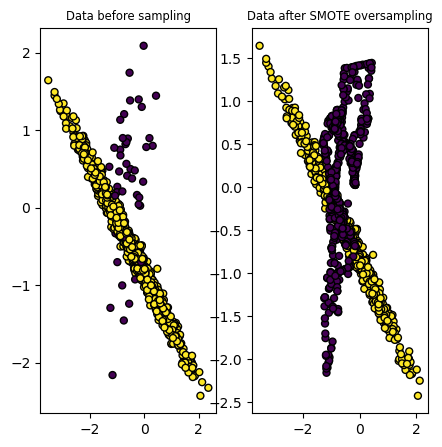

In [11]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")
plt.subplot(122)
plt.title("Data after SMOTE oversampling", fontsize="small")
plt.scatter(X_res_smote[:, 0], X_res_smote[:, 1], marker="o",c=y_res_smote, s=25, edgecolor="k")

SMOTE has limitation: it's constructed a "bridge" between the main red point cloud and a handful of outlier points located in the yellow cluster

In [13]:
#Creating and evaluating the model
X_res_smote_train, X_res_smote_test, y_res_smote_train, y_res_smote_test = train_test_split(
    X_res_smote, y_res_smote, test_size=0.33, random_state=42)

model.fit(X_res_smote_train,y_res_smote_train)
y_res_smote_pred = model.predict(X_res_smote_test)
print(classification_report(y_res_smote_test, y_res_smote_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75       203
           1       0.74      0.90      0.81       215

    accuracy                           0.79       418
   macro avg       0.80      0.78      0.78       418
weighted avg       0.80      0.79      0.78       418



While oversampling can help to improve the performance of machine learning algorithms on imbalanced datasets, it can also lead to a decrease in precision.This is because the new synthetic samples may not be representative of the true minority class. As a result, the model may be more likely to predict the minority class for samples that are actually from the majority class.
1. Introduction of noisy instances:
SMOTE creates new synthetic samples by randomly selecting a minority class sample and then generating a new sample along the line segment connecting that sample to one of its nearest neighbors. This process can introduce noisy instances into the dataset, which can lead to a decrease in precision.
2. Overfitting:
SMOTE can also lead to overfitting, which occurs when the model learns the training data too well and is unable to generalize to new data. Overfitting can also lead to a decrease in precision.
3. Imbalanced class distribution:
Even after oversampling, the class distribution may still be imbalanced. This can lead to the model being more likely to predict the majority class, even for samples that are actually from the minority class.
###To address these issues, there are a number of techniques that can be used, such as:
1. Using a different oversampling technique:
There are a number of other oversampling techniques that can be used, such as ADASYN (Adaptive Synthetic Sampling) and Borderline-SMOTE. These techniques can help to reduce the introduction of noisy instances and overfitting.
2. Using a combination of oversampling and undersampling:
Combining oversampling with undersampling can help to create a more balanced class distribution. This can help to improve the precision of the model.
3. Using a regularization technique:
Regularization techniques can help to prevent overfitting. Some common regularization techniques include L1 regularization and L2 regularization.

Before oversampling class size:Counter({1: 633, 0: 37})
After oversampling class size:Counter({1: 633, 0: 633})


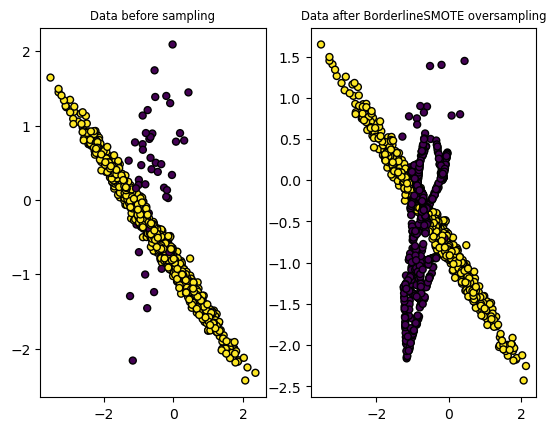

In [14]:
# using BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_res_bs, y_res_bs = sm.fit_resample(X_train,y_train)
print("Before oversampling class size:{}".format(Counter(y_train)))
print("After oversampling class size:{}".format(Counter(y_res_bs)))
#plt.figure(figsize=(5,5))
plt.subplot(121)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")
#plt.figure(figsize=(5,5))
plt.subplot(122)
plt.title("Data after BorderlineSMOTE oversampling", fontsize="small")
plt.scatter(X_res_bs[:, 0], X_res_bs[:, 1], marker="o",c=y_res_bs, s=25, edgecolor="k")

In [15]:
X_res_bs_train, X_res_bs_test, y_res_bs_train, y_res_bs_test = train_test_split(
    X_res_bs, y_res_bs, test_size=0.33, random_state=42)

model.fit(X_res_bs_train,y_res_bs_train)
y_res_bs_pred = model.predict(X_res_bs_test)
print(classification_report(y_res_bs_test, y_res_bs_pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52       203
           1       0.55      0.56      0.56       215

    accuracy                           0.54       418
   macro avg       0.54      0.54      0.54       418
weighted avg       0.54      0.54      0.54       418



not much performance is increased

Before oversampling class size:Counter({1: 633, 0: 37})
After oversampling class size:Counter({1: 633, 0: 633})


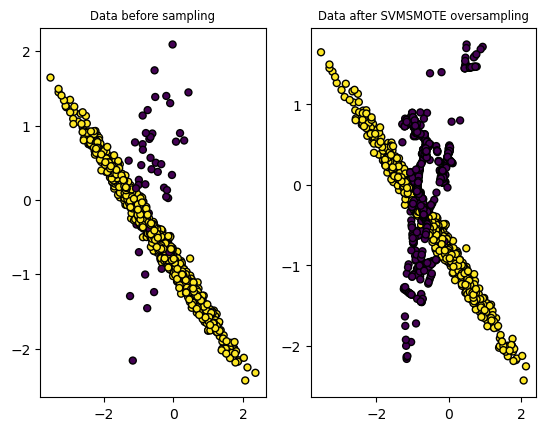

In [16]:
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res_sv, y_res_sv = sm.fit_resample(X_train,y_train)
print("Before oversampling class size:{}".format(Counter(y_train)))
print("After oversampling class size:{}".format(Counter(y_res_sv)))
#plt.figure(figsize=(5,5))
plt.subplot(121)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")
#plt.figure(figsize=(5,5))
plt.subplot(122)
plt.title("Data after SVMSMOTE oversampling", fontsize="small")
plt.scatter(X_res_sv[:, 0], X_res_sv[:, 1], marker="o",c=y_res_sv, s=25, edgecolor="k")

In [17]:
X_res_sv_train, X_res_sv_test, y_res_sv_train, y_res_sv_test = train_test_split(
    X_res_sv, y_res_sv, test_size=0.33, random_state=42)

model.fit(X_res_sv_train,y_res_sv_train)
y_res_sv_pred = model.predict(X_res_sv_test)
print(classification_report(y_res_sv_test, y_res_sv_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.77       203
           1       0.75      0.89      0.82       215

    accuracy                           0.79       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.80      0.79      0.79       418



Before oversampling class size:Counter({1: 633, 0: 37})
After oversampling class size:Counter({1: 633, 0: 631})


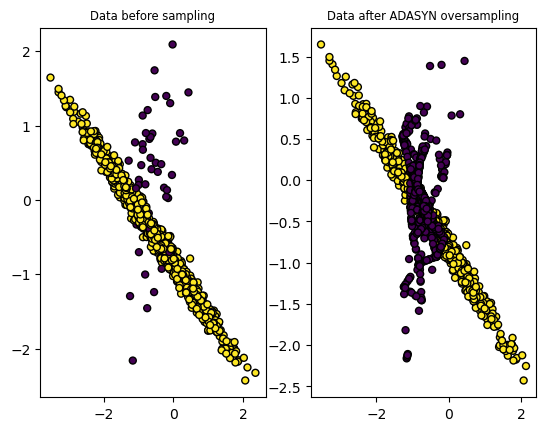

In [18]:
# Using ADASYN method
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res_ada, y_res_ada = sm.fit_resample(X_train,y_train)
print("Before oversampling class size:{}".format(Counter(y_train)))
print("After oversampling class size:{}".format(Counter(y_res_ada)))
#plt.figure(figsize=(5,5))
plt.subplot(121)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")
#plt.figure(figsize=(5,5))
plt.subplot(122)
plt.title("Data after ADASYN oversampling", fontsize="small")
plt.scatter(X_res_ada[:, 0], X_res_ada[:, 1], marker="o",c=y_res_ada, s=25, edgecolor="k")

In [19]:
#Creating and evaluating the model
X_res_ada_train, X_res_ada_test, y_res_ada_train, y_res_ada_test = train_test_split(
    X_res_ada, y_res_ada, test_size=0.33, random_state=42)

model.fit(X_res_ada_train,y_res_ada_train)
y_res_ada_pred = model.predict(X_res_ada_test)
print(classification_report(y_res_ada_test, y_res_ada_pred))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       205
           1       0.58      0.54      0.56       213

    accuracy                           0.57       418
   macro avg       0.57      0.57      0.57       418
weighted avg       0.57      0.57      0.57       418



ADASYN stands for Adaptive Synthetic Sampling. It is an oversampling technique used in machine learning to address imbalanced datasets.ADASYN uses (1) the kind='normal' SMOTE algorithm (2) on point not in homogenous neighborhoods. The result is a kind of hybrid between regular SMOTE and borderlineSMOTE.

## The best approach will vary depending on the specific dataset and machine learning model being used.

### Undersampling method 

Before undersampling class size:Counter({1: 633, 0: 37})
After undersampling with NearMissversion1 class size:Counter({0: 37, 1: 37})
After undersampling with NearMiss version2 class size:Counter({0: 37, 1: 37})
After undersampling with NearMiss version3 class size:Counter({0: 37, 1: 37})


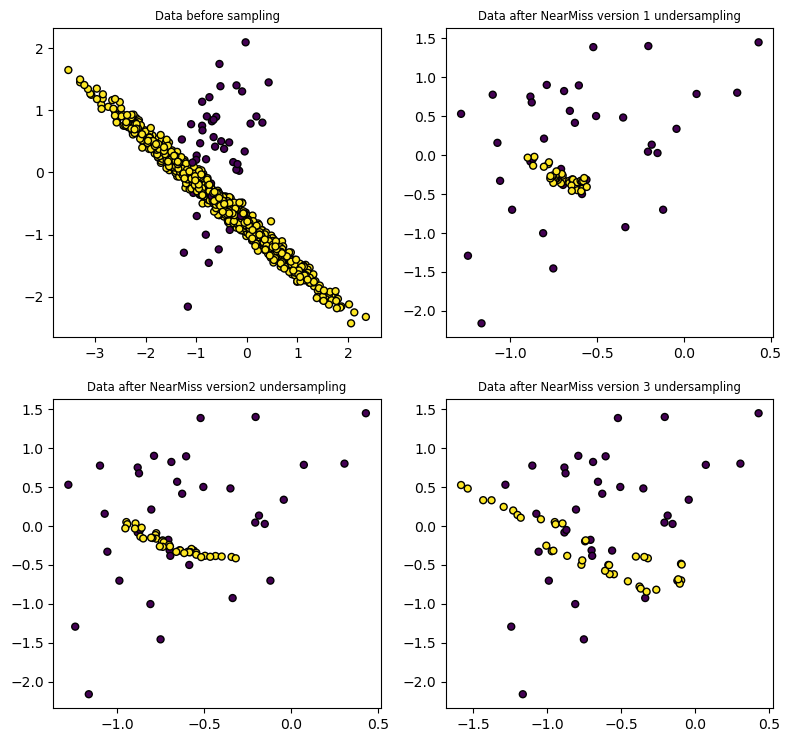

In [21]:
from imblearn.under_sampling import NearMiss
sm = NearMiss()
sm2=NearMiss(version=2)
sm3=NearMiss(version=3)
X_res1, y_res1 = sm.fit_resample(X_train,y_train)
X_res2, y_res2 = sm2.fit_resample(X_train,y_train)
X_res3, y_res3 = sm3.fit_resample(X_train,y_train)
print("Before undersampling class size:{}".format(Counter(y_train)))
print("After undersampling with NearMissversion1 class size:{}".format(Counter(y_res)))
print("After undersampling with NearMiss version2 class size:{}".format(Counter(y_res2)))
print("After undersampling with NearMiss version3 class size:{}".format(Counter(y_res3)))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(221)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")

plt.subplot(222)
plt.title("Data after NearMiss version 1 undersampling", fontsize="small")
plt.scatter(X_res[:, 0], X_res[:, 1], marker="o",c=y_res, s=25, edgecolor="k")

plt.subplot(223)
plt.title("Data after NearMiss version2 undersampling", fontsize="small")
plt.scatter(X_res2[:, 0], X_res2[:, 1], marker="o",c=y_res2, s=25, edgecolor="k")

plt.subplot(224)
plt.title("Data after NearMiss version 3 undersampling", fontsize="small")
plt.scatter(X_res3[:, 0], X_res3[:, 1], marker="o",c=y_res3, s=25, edgecolor="k")

In [22]:
#Creating and evaluating the model for version 1
X_res1_train, X_res1_test, y_res1_train, y_res1_test = train_test_split(
    X_res1, y_res1, test_size=0.33, random_state=42)

model.fit(X_res1_train,y_res1_train)
y_res1_pred = model.predict(X_res1_test)
print(classification_report(y_res1_test, y_res1_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.58      1.00      0.73        11

    accuracy                           0.68        25
   macro avg       0.79      0.71      0.67        25
weighted avg       0.81      0.68      0.66        25



In [23]:
#Creating and evaluating the model for version 2
X_res2_train, X_res2_test, y_res2_train, y_res2_test = train_test_split(
    X_res2, y_res2, test_size=0.33, random_state=42)

model.fit(X_res2_train,y_res2_train)
y_res2_pred = model.predict(X_res2_test)
print(classification_report(y_res2_test, y_res2_pred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        14
           1       0.55      1.00      0.71        11

    accuracy                           0.64        25
   macro avg       0.78      0.68      0.62        25
weighted avg       0.80      0.64      0.61        25



In [24]:
#Creating and evaluating the model for version 3
X_res3_train, X_res3_test, y_res3_train, y_res3_test = train_test_split(
    X_res3, y_res3,test_size=0.33, random_state=42)

model.fit(X_res3_train,y_res3_train)
y_res3_pred = model.predict(X_res3_test)
print(classification_report(y_res3_test, y_res3_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        14
           1       0.61      1.00      0.76        11

    accuracy                           0.72        25
   macro avg       0.81      0.75      0.71        25
weighted avg       0.83      0.72      0.71        25



Before undersampling class size:Counter({1: 950, 0: 50})
After undersampling with Condensed NN class size:Counter({1: 40, 0: 37})
After undersampling with Edited NN class size:Counter({1: 262, 0: 37})
After undersampling with Random Under Sampler class size:Counter({0: 37, 1: 37})


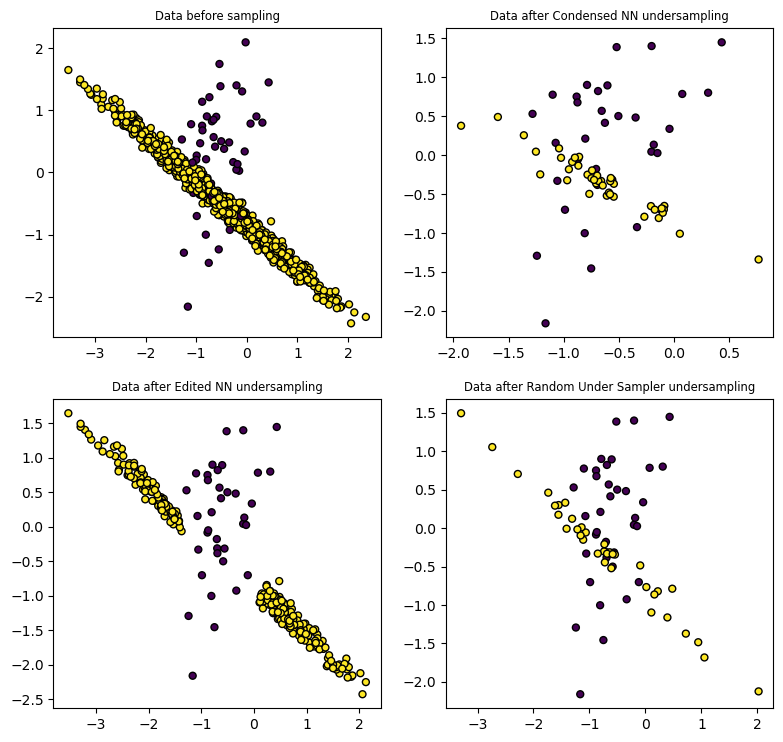

In [36]:
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours,RandomUnderSampler
cnn= CondensedNearestNeighbour(random_state=42)
enn=EditedNearestNeighbours(sampling_strategy='majority',n_neighbors=100)
rus=RandomUnderSampler(random_state=42)
X_rescnn, y_rescnn = cnn.fit_resample(X_train,y_train)
X_resenn, y_resenn = enn.fit_resample(X_train,y_train)
X_resrus, y_resrus = rus.fit_resample(X_train,y_train)
print("Before undersampling class size:{}".format(Counter(y)))
print("After undersampling with Condensed NN class size:{}".format(Counter(y_rescnn)))
print("After undersampling with Edited NN class size:{}".format(Counter(y_resenn)))
print("After undersampling with Random Under Sampler class size:{}".format(Counter(y_resrus)))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(221)
plt.title("Data before sampling", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o",c=y, s=25, edgecolor="k")

plt.subplot(222)
plt.title("Data after Condensed NN undersampling", fontsize="small")
plt.scatter(X_rescnn[:, 0], X_rescnn[:, 1], marker="o",c=y_rescnn, s=25, edgecolor="k")

plt.subplot(223)
plt.title("Data after Edited NN undersampling", fontsize="small")
plt.scatter(X_resenn[:, 0], X_resenn[:, 1], marker="o",c=y_resenn, s=25, edgecolor="k")

plt.subplot(224)
plt.title("Data after Random Under Sampler undersampling", fontsize="small")
plt.scatter(X_resrus[:, 0], X_resrus[:, 1], marker="o",c=y_resrus, s=25, edgecolor="k")

In [37]:
#Creating and evaluating the model for CNN
X_rescnn_train, X_rescnn_test, y_rescnn_train, y_rescnn_test = train_test_split(
    X_rescnn, y_rescnn, test_size=0.33, random_state=42)

model.fit(X_rescnn_train,y_rescnn_train)
y_rescnn_pred = model.predict(X_rescnn_test)
print(classification_report(y_rescnn_test, y_rescnn_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.67      1.00      0.80        12

    accuracy                           0.77        26
   macro avg       0.83      0.79      0.76        26
weighted avg       0.85      0.77      0.76        26



In [38]:
#Creating and evaluating the model for ENN
X_resenn_train, X_resenn_test, y_resenn_train, y_resenn_test = train_test_split(
    X_resenn, y_resenn, test_size=0.33, random_state=42)

model.fit(X_resenn_train,y_resenn_train)
y_resenn_pred = model.predict(X_resenn_test)
print(classification_report(y_resenn_test, y_resenn_pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.89      1.00      0.94        85

    accuracy                           0.89        99
   macro avg       0.94      0.61      0.65        99
weighted avg       0.90      0.89      0.86        99



In [39]:
#Creating and evaluating the model for RUS
X_resrus_train, X_resrus_test, y_resrus_train, y_resrus_test = train_test_split(
    X_resrus, y_resrus, test_size=0.33, random_state=42)

model.fit(X_resrus_train,y_resrus_train)
y_resrus_pred = model.predict(X_resrus_test)
print(classification_report(y_resrus_test, y_resrus_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.53      0.73      0.62        11

    accuracy                           0.60        25
   macro avg       0.62      0.61      0.60        25
weighted avg       0.63      0.60      0.60        25



In [109]:
from sklearn.datasets import make_moons
X,y = make_moons(random_state=42,noise=1)

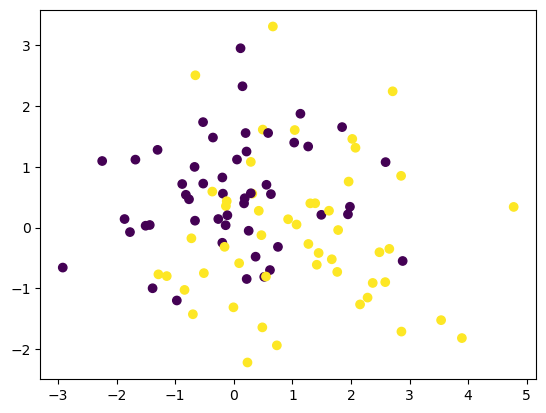

In [110]:
plt.scatter(X[:,0],X[:,1],c=y)